In [6]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt

In [7]:
outlier = [('8616-3703', 0.135063), ('7992-9102', 0.119399), ('8318-6102', 0.12908)]

In [8]:
def Mpc_to_cm(Mpc):
    return Mpc * 3.08568*(10**24)

def luminosity_calc(luminosity_distance, fluxarea):
    return 4 * np.pi * (luminosity_distance**2) * fluxarea * (1e-17)

In [9]:
ha_lum_dist = [636.1, 556.7, 605.6,]

In [10]:
csv_input = pd.read_csv('outlier.csv')
csv_input['D_L Mpc'] = ha_lum_dist
csv_input.to_csv('outlier.csv', index=False)

In [11]:
ha_table_1 = pd.read_csv('outlier.csv')
# ha_table_1

In [12]:
lum_dist = ha_table_1['D_L Mpc']
flux = ha_table_1['flux']

lum_dist_cm = []
luminosity = []

for i in range(len(lum_dist)):
    lum_dist_cm.append(Mpc_to_cm(lum_dist[i]))
    luminosity.append(luminosity_calc(Mpc_to_cm(lum_dist[i]), flux[i]))

In [13]:
csv_input = pd.read_csv('outlier.csv')
csv_input['D_L cm'] = lum_dist_cm
csv_input.to_csv('outlier.csv', index=False)

In [14]:
csv_input = pd.read_csv('outlier.csv')
csv_input['L erg/s'] = luminosity
csv_input.to_csv('outlier.csv', index=False)

In [15]:
ha_table_1 = pd.read_csv('outlier.csv')
ha_table_1

,mangaid,plateifu,nsa_z,flux,FWHM km/s,D_L Mpc,D_L cm,L erg/s
0,1-180308,8616-3703,0.135063,1369.490363,267.402175,636.1,1.962801e+27,6.630120e+41
1,1-22948,7992-9102,0.119399,901.779496,-98.558656,556.7,1.717798e+27,3.343909e+41
2,1-284293,8318-6102,0.129080,2809.973360,132.333451,605.6,1.868688e+27,1.233064e+42


# DAP -- Table 1

In [16]:
DAP = pd.read_csv('/Users/natachaupra/Desktop/Snr_Prj/Snr-Prj/Data/DAP.csv', sep=',')

In [17]:
DAP1 = DAP.copy()

In [18]:
idx = [120, 8, 54]
given_lum_dist = []
for i in range(len(outlier)):
    given_lum_dist.append((DAP1.loc[DAP1['plateifu'] == outlier[i][0]])['ldist_nsa_z'][idx[i]])

In [19]:
csv_input = pd.read_csv('outlier.csv')
csv_input['Given D_L Mpc'] = given_lum_dist
csv_input.to_csv('outlier.csv', index=False)
ha_table_1 = pd.read_csv('outlier.csv')

In [20]:
given_flux = []
for i in range(len(outlier)):
    given_flux.append((DAP1.loc[DAP1['plateifu'] == outlier[i][0]])['emline_sflux_tot_ha_6564'][idx[i]])

In [21]:
csv_input = pd.read_csv('outlier.csv')
csv_input['Given flux'] = given_flux
csv_input.to_csv('outlier.csv', index=False)
ha_table_1 = pd.read_csv('outlier.csv')
ha_table_1

,mangaid,plateifu,nsa_z,flux,FWHM km/s,D_L Mpc,D_L cm,L erg/s,Given D_L Mpc,Given flux
0,1-180308,8616-3703,0.135063,1369.490363,267.402175,636.1,1.962801e+27,6.630120e+41,445.2860,1656.7860
1,1-22948,7992-9102,0.119399,901.779496,-98.558656,556.7,1.717798e+27,3.343909e+41,389.6841,980.3219
2,1-284293,8318-6102,0.129080,2809.973360,132.333451,605.6,1.868688e+27,1.233064e+42,423.9317,2352.4330


In [22]:
res = np.polyfit(ha_table_1['flux'], ha_table_1['Given flux'], 1)
res

array([  0.66331009, 539.70032981])

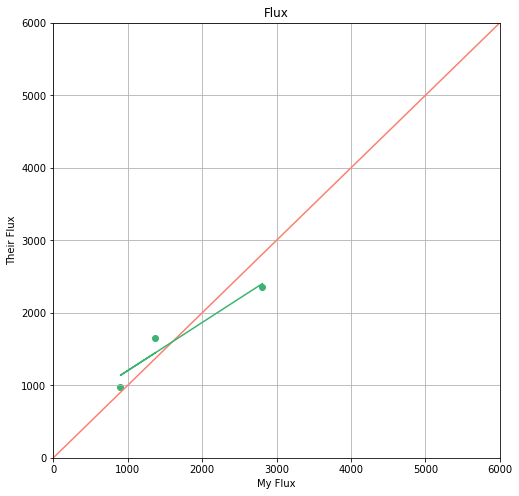

In [23]:
plt.figure(figsize = (8,8))
plt.grid()
plt.xlim(0,6000)
plt.ylim(0,6000)
plt.xlabel('My Flux')
plt.ylabel('Their Flux')
plt.title('Flux')
plt.plot([0,6000], [0,6000], color = 'salmon')
plt.scatter(ha_table_1['flux'], ha_table_1['Given flux'], color = 'mediumseagreen')
plt.plot(ha_table_1['flux'], (res[0]*ha_table_1['flux'])+res[1], color = 'mediumseagreen')

In [24]:
their_lum = []
for i in range(len(idx)):
    their_lum.append(luminosity_calc(ha_table_1['D_L cm'][i], ha_table_1['Given flux'][i]))

In [25]:
csv_input = pd.read_csv('outlier.csv')
csv_input['Their Lum'] = their_lum
csv_input.to_csv('outlier.csv', index=False)
ha_table_1 = pd.read_csv('outlier.csv')
ha_table_1

,mangaid,plateifu,nsa_z,flux,FWHM km/s,D_L Mpc,D_L cm,L erg/s,Given D_L Mpc,Given flux,Their Lum
0,1-180308,8616-3703,0.135063,1369.490363,267.402175,636.1,1.962801e+27,6.630120e+41,445.2860,1656.7860,8.021006e+41
1,1-22948,7992-9102,0.119399,901.779496,-98.558656,556.7,1.717798e+27,3.343909e+41,389.6841,980.3219,3.635154e+41
2,1-284293,8318-6102,0.129080,2809.973360,132.333451,605.6,1.868688e+27,1.233064e+42,423.9317,2352.4330,1.032287e+42


In [26]:
res2 = np.polyfit(np.log10(ha_table_1['L erg/s']), np.log10(ha_table_1['Their Lum']),1)
res2

array([0.80592038, 8.12883677])

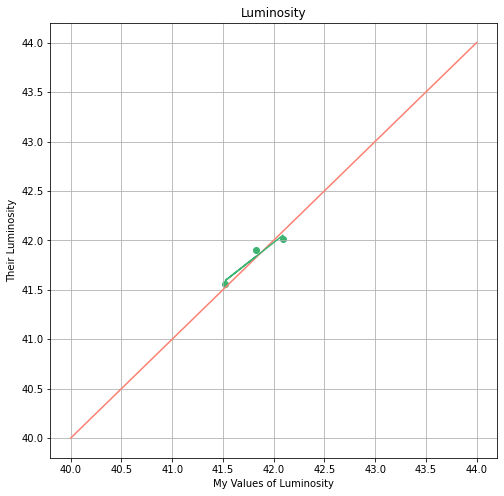

In [27]:
plt.figure(figsize = (8,8))
plt.grid()
# plt.xlim(350,650)
# plt.ylim(350,650)
plt.xlabel('My Values of Luminosity')
plt.ylabel('Their Luminosity')
plt.title('Luminosity')
plt.plot([40,44], [40,44], color = 'salmon')
plt.scatter(np.log10(ha_table_1['L erg/s']), np.log10(ha_table_1['Their Lum']), color = 'mediumseagreen')
plt.plot(np.log10(ha_table_1['L erg/s']), (res2[0]*np.log10(ha_table_1['L erg/s'])) + res2[1],
        color = 'mediumseagreen')